# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

####  Every thing is dependent on what the story is assuming no toher context/background is given I will pick Image/graph for the datasize v/s  loss function - picture 1.

- Assuming the story is targeted for management - Based on what Kurt Vonnegut mentioned with keep it simple and have the guts to cut I will graph 1.  The graph of loss function data size is showing us rate of learning on size of training data. Thats very important as we want something to train quickly and also if we know how much data is good enough to get to reasonable accuracy(loss function) we can save time and money. This is something the organization will care as well as it will  save money in pre-processing data which is one of the most labor intensive and expensive part of the data science process.

- If the story is to analyze performance of the model and hyperparameter tuning - Then I will pick the 2nd graph as it showing us how no of estimators is influencing the loss function. This is important as we want to know how many trees we need to get to a reasonable accuracy. This is could be important for the data science team /engineers.

#### The loss function is a dependent variable(ie outcome of the process so it should be in y axis. The one we can control should be on X axis (here it is the data size)

In [63]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [64]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

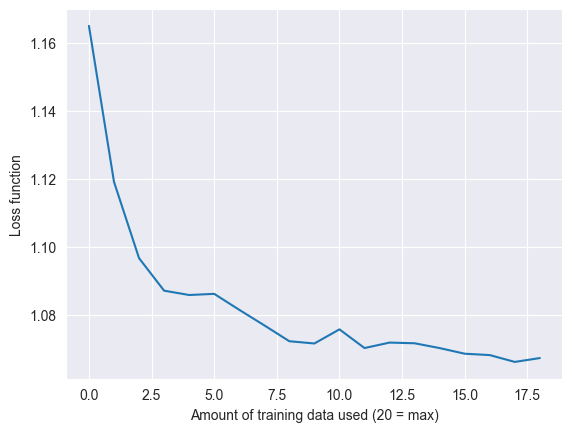

In [65]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [66]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

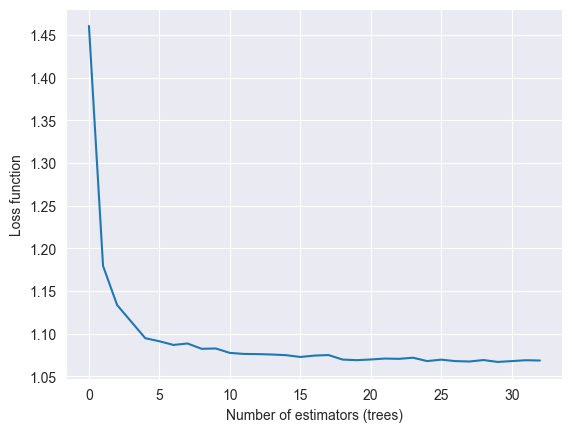

In [67]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [68]:
%run "OMDS-MODB2-Week6-Halder-Deb_CISA_UCI_for Mod2.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              774 non-null    object 
 1   vendor_project      774 non-null    object 
 2   product             773 non-null    object 
 3   vulnerability_name  774 non-null    object 
 4   date_added          774 non-null    object 
 5   short_description   768 non-null    object 
 6   required_action     774 non-null    object 
 7   due_date            774 non-null    object 
 8   notes               0 non-null      float64
 9   grp                 774 non-null    int64  
 10  pub_date            765 non-null    object 
 11  cvss                609 non-null    float64
 12  cwe                 760 non-null    object 
 13  vector              609 non-null    object 
 14  complexity          609 non-null    object 
 15  severity            609 non-null    object 
dtypes: float

### Using phishing webpage dataset- Dataset 3(alternate dataset as CISA dataset is not having relevant info), dataset given as a part of the mod2 capstone project

- a. Random forest model

- b. perform cross validation

- c. Tune hyper parameters

- Evaluate a performance metric

In [69]:
week11_phishing_website_df = df_sample_phishing_UCI_numerical.copy()
week11_phishing_website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   100000 non-null  int64  
 1   DomainLength                100000 non-null  int64  
 2   IsDomainIP                  100000 non-null  int64  
 3   URLSimilarityIndex          100000 non-null  float64
 4   CharContinuationRate        100000 non-null  float64
 5   TLDLegitimateProb           100000 non-null  float64
 6   URLCharProb                 100000 non-null  float64
 7   TLDLength                   100000 non-null  int64  
 8   NoOfSubDomain               100000 non-null  int64  
 9   HasObfuscation              100000 non-null  int64  
 10  NoOfObfuscatedChar          100000 non-null  int64  
 11  ObfuscationRatio            100000 non-null  float64
 12  NoOfLettersInURL            100000 non-null  int64  
 13  LetterRatioInUR

In [70]:
def feature_pair_above_correlation_threshold(dataset_df, corr_threshold=0.9 ):
    correlation_matrix = dataset_df.corr()

    high_corr_features = [
        (correlation_matrix.columns[i], correlation_matrix.columns[j],
         correlation_matrix.loc[correlation_matrix.columns[i], correlation_matrix.columns[j]])
        for i in range(len(correlation_matrix.columns))
        for j in range(i+1, len(correlation_matrix.columns))
        if abs(correlation_matrix.loc[correlation_matrix.columns[i], correlation_matrix.columns[j]]) > corr_threshold
    ]

    print(f"Highly Correlated Features (|r| > {corr_threshold}):")
    if high_corr_features:
        for feat1, feat2, corr in high_corr_features:
            print(f"{feat1} - {feat2}: Correlation = {corr:.4f}")
    else:
        print("No features found above the correlation threshold.")

    return high_corr_features
  # In the original data set I am seeing the model is having fi score, precision and recall nearl 0.99 and rms error very low
  # let me ensure there is no data leakage through high feature pair correlation so let us identify anything about 0.7 so we can drop the columns
feature_pair_above_correlation_threshold(week11_phishing_website_df, 0.70)

Highly Correlated Features (|r| > 0.7):
URLLength - NoOfLettersInURL: Correlation = 0.9681
URLLength - NoOfDegitsInURL: Correlation = 0.8181
URLLength - NoOfOtherSpecialCharsInURL: Correlation = 0.7395
URLSimilarityIndex - label: Correlation = -0.8445
URLCharProb - DegitRatioInURL: Correlation = -0.7213
HasObfuscation - ObfuscationRatio: Correlation = 0.8002
NoOfDegitsInURL - NoOfEqualsInURL: Correlation = 0.7176
NoOfEqualsInURL - NoOfOtherSpecialCharsInURL: Correlation = 0.7311
DomainTitleMatchScore - URLTitleMatchScore: Correlation = 0.9552
HasDescription - label: Correlation = -0.7089
HasSocialNet - label: Correlation = -0.8066
HasCopyrightInfo - label: Correlation = -0.7578


[('URLLength', 'NoOfLettersInURL', np.float64(0.968057690360021)),
 ('URLLength', 'NoOfDegitsInURL', np.float64(0.818086688926542)),
 ('URLLength', 'NoOfOtherSpecialCharsInURL', np.float64(0.7394564931924791)),
 ('URLSimilarityIndex', 'label', np.float64(-0.8444755463360579)),
 ('URLCharProb', 'DegitRatioInURL', np.float64(-0.721324084170132)),
 ('HasObfuscation', 'ObfuscationRatio', np.float64(0.8002225823781832)),
 ('NoOfDegitsInURL', 'NoOfEqualsInURL', np.float64(0.7176340125023788)),
 ('NoOfEqualsInURL',
  'NoOfOtherSpecialCharsInURL',
  np.float64(0.7310641154327281)),
 ('DomainTitleMatchScore',
  'URLTitleMatchScore',
  np.float64(0.9552271693597835)),
 ('HasDescription', 'label', np.float64(-0.7089272007166554)),
 ('HasSocialNet', 'label', np.float64(-0.8066144157542924)),
 ('HasCopyrightInfo', 'label', np.float64(-0.7578098651881627))]

In [71]:
# drop the one of the two columns. 'label' is my target column so keeping it but taking out the URLSimilarityIndex
week11_phishing_website_df.drop(columns=["NoOfLettersInURL", "URLSimilarityIndex", "URLTitleMatchScore", "HasCopyrightInfo","HasSocialNet","ObfuscationRatio", "NoOfDegitsInURL", "HasDescription", "NoOfOtherSpecialCharsInURL","URLCharProb","NoOfOtherSpecialCharsInURL"], inplace=True)

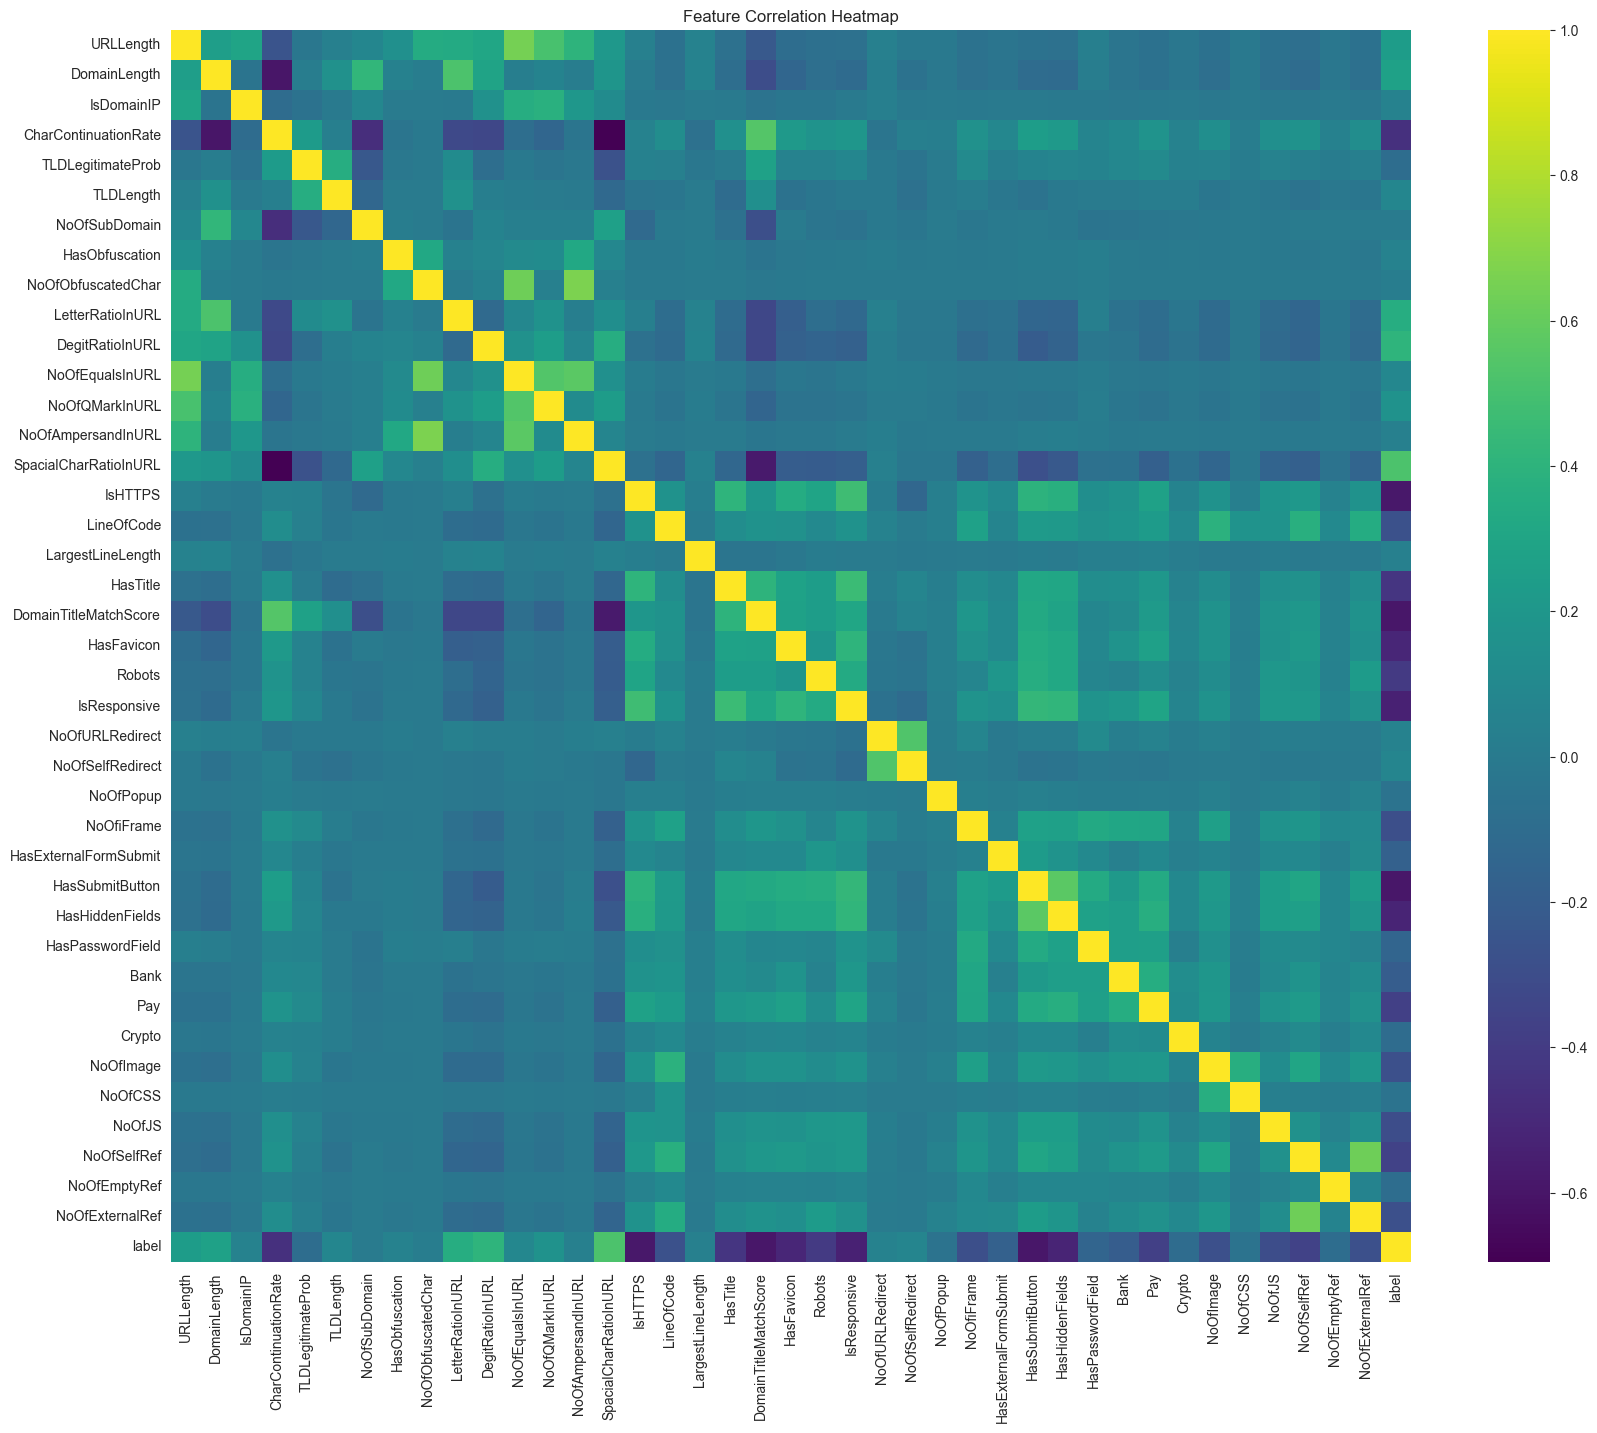

In [72]:
# view correlation matrix
correlation_matrix = week11_phishing_website_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

#### We can see there are no yellow or nearby color  which also matches the threshold that we have filter out which si anything higher than 0.7

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy import stats
from sklearn.metrics import mean_squared_error  #adding the below import so we can calculate the mean squared error
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, classification_report, confusion_matrix


np.random.seed(0)
#let me get the target value from main dataset

week11_phishing_website_df = week11_phishing_website_df.sample(frac=1, random_state=23).reset_index(drop=True)
y = week11_phishing_website_df['label']
X = week11_phishing_website_df.drop(columns=['label'])

# let me standardize the data using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  setup and config
result_df = pd.DataFrame()
random_value = [19,21,23,99]  # random value to be used for r different test to do an average at the end
no_of_iter = 3 # number iof iterations to run the test

for random_int in random_value:
	rsCV = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=random_int), param_distributions = {"n_estimators": [2, 4, 16, 32,64, 90,132], "max_depth": [2, 4, 10,20, 30,50, 60]}, scoring = "neg_mean_squared_error", cv=5, n_iter=no_of_iter, random_state=random_int)
	X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=random_int)
	rsCV.fit(X_train, y_train)
	y_pred_best = rsCV.best_estimator_.predict(X_test)
	#since the data is binary so lets round it
	y_pred_best = np.round(y_pred_best)
	corr , p_value = stats.pearsonr( y_pred_best, y_test,)
    # add to  a dataframe result_df and have columns alpha, corr, p_value best_estimator, best_params, best_score, f1score, precision and recall
	row_data= pd.DataFrame({ "corr" : [corr], "p_value" : [p_value], "best_estimator":[str(rsCV.best_estimator_)], "best_params":[str(rsCV.best_params_)], "best_score":[str(rsCV.best_score_)] ,"rmse": [mean_squared_error(y_test, y_pred_best)],"f1_score": [f1_score(y_test, y_pred_best)],
        "precision": [precision_score(y_test, y_pred_best)],
        "recall": [recall_score(y_test, y_pred_best)]})
	result_df = pd.concat([result_df,row_data], ignore_index=True)
sorted_df_neg_mean_squared = result_df.sort_values(by='corr', ascending=False)
print(sorted_df_neg_mean_squared)

      corr  p_value                                     best_estimator  \
0  0.99804      0.0  RandomForestRegressor(max_depth=50, n_estimato...   
3  0.99740      0.0  RandomForestRegressor(max_depth=20, n_estimato...   
2  0.99692      0.0  RandomForestRegressor(max_depth=10, n_estimato...   
1  0.99616      0.0  RandomForestRegressor(max_depth=60, n_estimato...   

                             best_params              best_score     rmse  \
0  {'n_estimators': 16, 'max_depth': 50}         -0.001237421875  0.00098   
3  {'n_estimators': 90, 'max_depth': 20}  -0.0012255288169262196  0.00130   
2  {'n_estimators': 64, 'max_depth': 10}   -0.001410244130337609  0.00154   
1   {'n_estimators': 4, 'max_depth': 60}  -0.0015412499999999999  0.00192   

   f1_score  precision    recall  
0  0.999019   0.999319  0.998719  
3  0.998702   0.998442  0.998961  
2  0.998456   0.997996  0.998917  
1  0.998080   0.998200  0.997961  


### Overall Analysis

- a. Model used- Random forest regressor with RandomizedSearchCV

- b. perform cross validation  : The code above did CV = 5 and n_iter = 3   so it did 5 fold cross validation and 3 iterations to arrive at the results and best hyper parameters

- c. Tune hyper parameters : Best Hyper parameter observed: {'n_estimators': 16, 'max_depth':50}

- Evaluate a performance metric : The best metric I can use is f1 score, precision and recall : 0..999, 0.999319 0.9987 respectively . This data is working very nicely with this  model. the rems error on both on the predicted target and the test is very similar and yet very .

- The model performance is stable the shuffling of data with various random number as  well as evern with train test split @ 0.5 we are getting this result. On research ing we see that the UCI data's quality is considered very good. Since feature was corellation is less than 0.7 and p value(0) from pearson correlation is very high so mosat likely the data is very good quality.


#### My expectation from a good phishing website identifier model vs result achieved

- Correlation above 0.7  / Achieved 0.998 with training set split of 0.5  (used only 100000 rows of data of UCI dataset)

- p_value as low as possible nearer to zero as that would mean statistically significant correlation without the chance of it being a fluke / Achieved very low ( 1.8 e to power -65) and near zero. This is very small and considered a goo data

- Mean Squared Error (MSE) as low as possible (best_score) / achieved 0.0715

- rmse(for test data)- Square of this value as near to MSE as possible / 0.084

- f1 Score - Reliability of the model in the range of .7 to 0.9 / Achieved 0.914

- precision - How many of the emails that were classified as spam were actually spam above 0.8 - 0.9 / Achieved 0.925

- recall - How many of the actual spam emails were classified as spam in the range of 0.8 to 0.9 / Achieved 0.903



# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

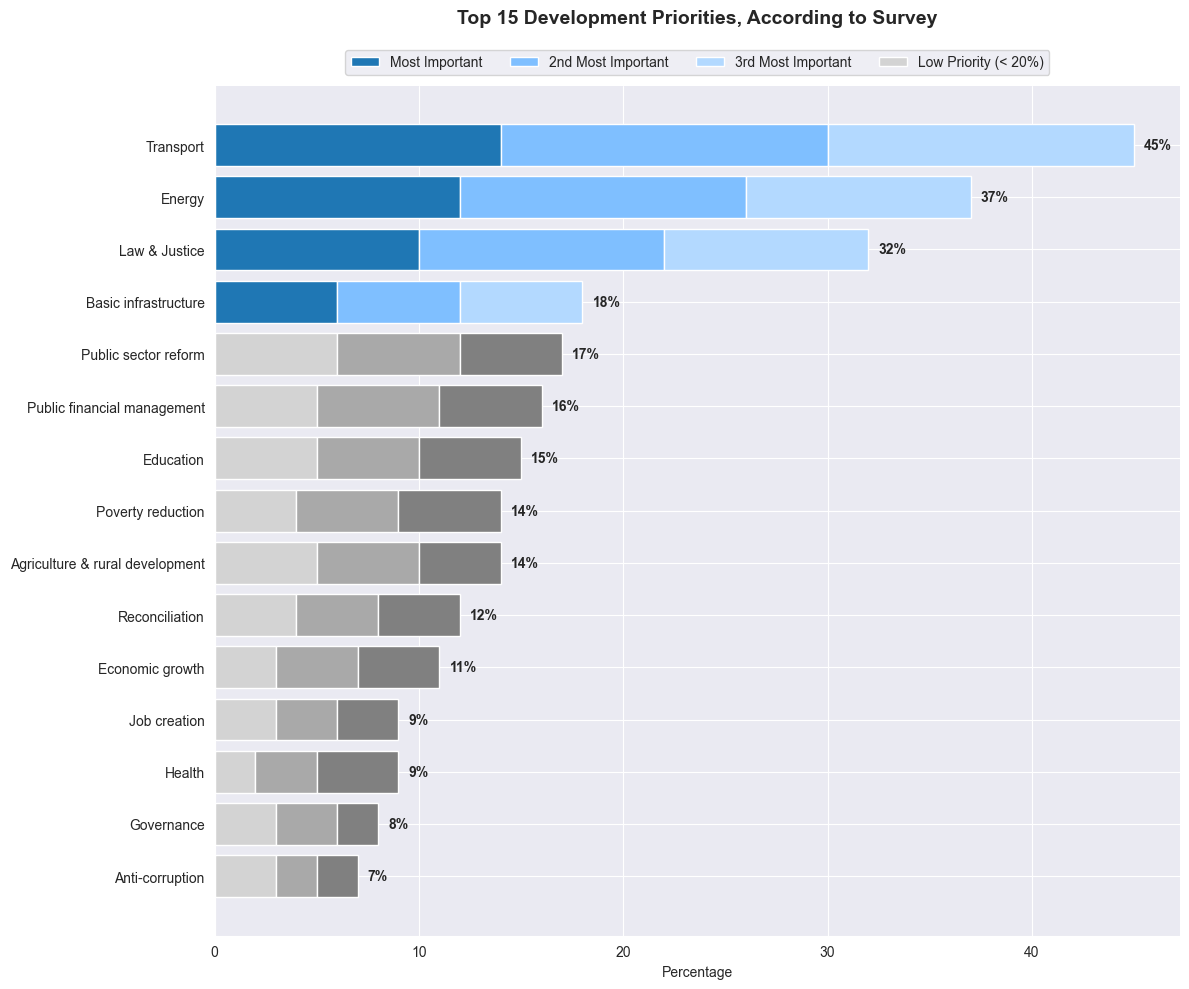

In [74]:
#I didnt find any graphs in the page range given in this homework , so picking up another new graph which I have not done before but within this page range

import matplotlib.pyplot as plt


# dev priorities identified

dev_priorities_labels = [
    'Anti-corruption', 'Governance', 'Job creation', 'Health', 'Economic growth',
    'Reconciliation', 'Poverty reduction', 'Agriculture & rural development',
    'Education', 'Public financial management', 'Public sector reform',
    'Basic infrastructure', 'Law & Justice', 'Energy', 'Transport'
]


light_blue  = '#1f77b4'
medium_blue = '#7fbfff'
darker_blue = '#b3d9ff'

# let me create data for survey plot
survey_most_important_counts = [3, 3, 3, 2, 3, 4, 4, 5, 5, 5, 6, 6, 10, 12, 14]
survey_second_important_counts = [2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 12, 14, 16]
survey_third_important_counts = [2, 2, 3, 4, 4, 4, 5, 4, 5, 5, 5, 6, 10, 11, 15]

total_percentages = [sum(x) for x in zip(survey_most_important_counts, survey_second_important_counts, survey_third_important_counts)]


sorted_data = sorted(
    zip(dev_priorities_labels, total_percentages, survey_most_important_counts, survey_second_important_counts, survey_third_important_counts),
    key=lambda x: x[1],
    reverse=True
)


dev_priorities_sorted, total_percentages_sorted, most_important_sorted, second_important_sorted, third_important_sorted = zip(*sorted_data)


myfig= plt.figure(figsize=(12, 10))


#let me create this method as I may have to call it multiple times and dont want to commit mistake
def get_value_based_color(total_per, threshold=20 ):
	light_blue  = '#1f77b4'
	medium_blue = '#7fbfff'
	darker_blue = '#b3d9ff'
	if total_per < threshold:
		return ['lightgrey', 'darkgrey', 'grey']
	else:
		return [light_blue, medium_blue, darker_blue]

#let me reverse the order in which the graph will show so highest is on top
for i, (priority, total, most, second, third) in enumerate(zip(
    reversed(dev_priorities_sorted),
    reversed(total_percentages_sorted),
    reversed(most_important_sorted),
    reversed(second_important_sorted),
    reversed(third_important_sorted)
)):
    colors = get_value_based_color(total, 18)

    plt.barh(i, most, color=colors[0], left=0)
    plt.barh(i, second, color=colors[1], left=most)
    plt.barh(i, third, color=colors[2], left=most+second)


    plt.text(total + 0.5, i, f'{total}%', va='center', fontweight='bold')

# set label and title
plt.xlabel('Percentage')
plt.title('Top 15 Development Priorities, According to Survey', fontsize=14, fontweight='bold', pad=45)


plt.yticks(range(len(dev_priorities_sorted)), list(reversed(dev_priorities_sorted)))

# create legend (https://labex.io/tutorials/matplotlib-composing-custom-legends-48641)
from matplotlib.patches import Patch

# use patch to create individual rectangular patch
# got help from chatgpt on "how to use legend patch" , matplotlib site was unclear

legend_elements = [
    Patch(facecolor= light_blue, label='Most Important'),
    Patch(facecolor= medium_blue, label='2nd Most Important'),
    Patch(facecolor= darker_blue, label='3rd Most Important'),
    Patch(facecolor='lightgrey', label='Low Priority (< 20%)')
]

#google search showed Moving Legend Outside the Plot: Use bbox_to_anchor and loc parameters

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4) # center aligned and 4 legend so fo col
plt.tight_layout()


plt.gca().spines['right'].set_visible(False)  # remove spines for less clutter
plt.gca().spines['top'].set_visible(False)

plt.show()